# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** muhammad wildan agba
- **Email:** wildan.agba@gmail.com
- **ID Dicoding:** wildanagba

## Menentukan Pertanyaan Bisnis

- performa penjualan & revenue perbulan dan tahun serta pergerakan setiap bulan nya
- Produk apa yang paling banyak terjual dan sedikit serta wilayah dengan pengiriman tercepat dan terlama

##jika menggunakan data dari kagle langsung dengan auth token

In [ ]:
#from google.colab import files

# Unggah file kaggle.json
#files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarahseher","key":"79f15c01333d38a8891e5db8c4b8670d"}'}

In [ ]:
#
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# -

In [ ]:
# !kaggle datasets download -d olistbr/brazilian-ecommerce


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## Data Wrangling

### Gathering Data

In [2]:
!git clone https://github.com/wildanagba45/Dashboard.git

Cloning into 'Dashboard'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (22/22), 46.42 MiB | 8.35 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [4]:
customers_ = pd.read_csv("/content/Dashboard/data/olist_customers_dataset.csv")
customers_.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders_item_ = pd.read_csv("/content/Dashboard/data/olist_order_items_dataset.csv")
orders_item_.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
product_ = pd.read_csv("/content/Dashboard/data/olist_products_dataset.csv")
product_.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [7]:
orders_ = pd.read_csv("/content/Dashboard/data/olist_orders_dataset.csv")
orders_.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
orders_pembayaran_ = pd.read_csv("/content/Dashboard/data/olist_order_payments_dataset.csv")
orders_pembayaran_.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
sellers_ = pd.read_csv("/content/Dashboard/data/olist_sellers_dataset.csv")
sellers_.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

####sellers_


In [10]:

print('ada :',sellers_.isna().sum())

print("Jumlah duplikasi: ", sellers_.duplicated().sum())

sellers_.describe()
sellers_.info()

ada : seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


#### customers

In [11]:
customers_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", customers_.duplicated().sum())
customers_.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### orders_item

In [14]:
orders_item_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
orders_item_.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [16]:
print("Jumlah duplikasi: ", orders_item_.duplicated().sum())
orders_item_.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### product_

In [17]:
product_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [18]:
product_.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [19]:
print("Jumlah duplikasi: ", product_.duplicated().sum())
product_.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### orders_

In [20]:
orders_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [21]:
orders_.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", orders_.duplicated().sum())
orders_.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### orders_pembayaran_

In [23]:
orders_pembayaran_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
orders_pembayaran_.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [25]:
print("Jumlah duplikasi: ", orders_pembayaran_.duplicated().sum())
orders_pembayaran_.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Cleaning Data

####sellers_

In [26]:
#menghapus duplikasi data
customers_.drop_duplicates(inplace=True)

In [27]:
#cek missing value
sellers_.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

#### customers_


In [28]:
#menghapus duplikasi data
customers_.drop_duplicates(inplace=True)

In [29]:
print("Jumlah duplikasi: ", customers_.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
#cek missing value
customers_.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### product_

In [31]:
#menghapus duplikasi data
product_.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", product_.duplicated().sum())

Jumlah duplikasi:  0


In [32]:
#cek missing value
product_.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [33]:
product_[product_.product_category_name.isna()]
product_[product_.product_name_lenght.isna()]
product_[product_.product_description_lenght.isna()]
product_[product_.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [34]:
# Menggantikan missing value dengan modus dari kolom 'product_category_name'
product_['product_category_name'].fillna(product_['product_category_name'].mode()[0], inplace=True)


In [35]:
# Menggantikan missing value dengan modus dari kolom 'product_category_name'
product_['product_name_lenght'].fillna(product_['product_name_lenght'].mode()[0], inplace=True)


In [36]:
product_[product_.product_category_name.isna()]
product_[product_.product_name_lenght.isna()]
product_[product_.product_description_lenght.isna()]
product_[product_.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,60.0,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,60.0,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,60.0,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,60.0,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,60.0,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,60.0,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,60.0,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,60.0,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,60.0,NaN,NaN,1300.0,45.0,16.0,45.0


In [37]:
product_.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

#### orders_

In [38]:
orders_[orders_.order_approved_at.isna()]
orders_[orders_.order_delivered_carrier_date.isna()]
orders_[orders_.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [39]:
# Mengonversi kolom tanggal ke tipe data datetime
orders_['order_approved_at'] = pd.to_datetime(orders_['order_approved_at'])
orders_['order_delivered_carrier_date'] = pd.to_datetime(orders_['order_delivered_carrier_date'])
orders_['order_delivered_customer_date'] = pd.to_datetime(orders_['order_delivered_customer_date'])

# Menggunakan metode fillna dengan linear interpolation
orders_.fillna(method='pad', inplace=True)  # forward fill (ffill)

In [40]:

orders_[orders_.order_approved_at.isna()]
orders_[orders_.order_delivered_carrier_date.isna()]
orders_[orders_.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [41]:

orders_.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### orders_pembayaran_

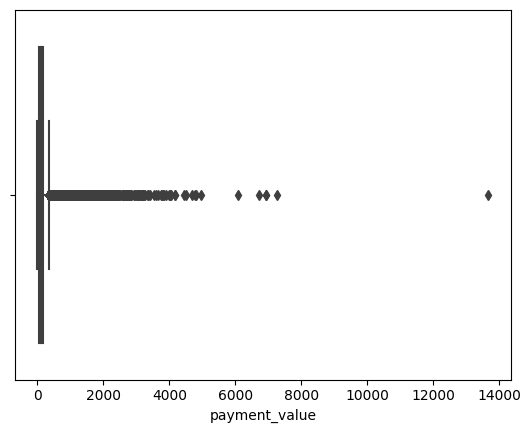

In [42]:
# Box plot untuk mendeteksi outliers
sns.boxplot(x=orders_pembayaran_['payment_value'])
plt.show()


In [43]:
# Menghitung Q1, Q3, dan IQR untuk kolom 'payment_value'
Q1 = orders_pembayaran_['payment_value'].quantile(0.25)
Q3 = orders_pembayaran_['payment_value'].quantile(0.75)
IQR = Q3 - Q1

# Menampilkan hasil
print("Data:")
print(orders_pembayaran_['payment_value'])
print("\nQ1:")
print(Q1)
print("\nQ3:")
print(Q3)
print("\nIQR:")
print(IQR)

Data:
0          99.33
1          24.39
2          65.71
3         107.78
4         128.45
           ...  
103881    363.31
103882     96.80
103883     47.77
103884    369.54
103885    191.58
Name: payment_value, Length: 103886, dtype: float64

Q1:
56.79

Q3:
171.8375

IQR:
115.04750000000001


In [44]:
# Menghitung Batas Atas dan Batas Bawah
upper_fence = Q3 + 1.5 * IQR
lower_fence = Q1 - 1.5 * IQR

# Identifikasi Outlier
outliers = orders_pembayaran_['payment_value'][(orders_pembayaran_['payment_value'] < lower_fence) | (orders_pembayaran_['payment_value'] > upper_fence)]

# Menampilkan hasil
print("Upper Fence:", upper_fence)
print("Lower Fence:", lower_fence)
print("Outliers:", outliers)


Upper Fence: 344.40875000000005
Lower Fence: -115.78125000000003
Outliers: 23        353.09
26        541.00
52        542.66
54        368.98
61        387.80
           ...  
103814    713.65
103843    372.08
103861    356.53
103881    363.31
103884    369.54
Name: payment_value, Length: 7981, dtype: float64


In [45]:
# Penanganan outlier: Contoh - Menggantikan outlier dengan nilai batas atas atau batas bawah
orders_pembayaran_['payment_value'] = orders_pembayaran_['payment_value'].clip(lower=lower_fence, upper=upper_fence)

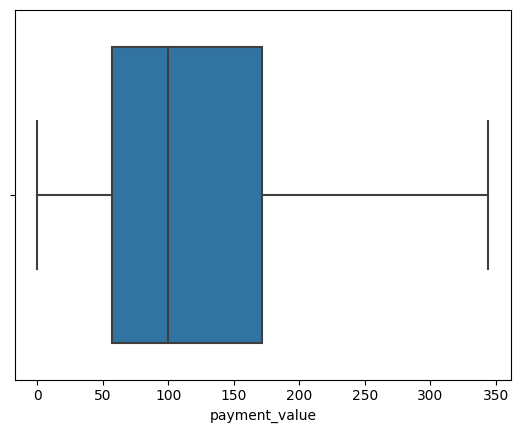

In [46]:
# Box plot untuk mendeteksi outliers
sns.boxplot(x=orders_pembayaran_['payment_value'])
plt.show()

##gabungkan data

In [47]:
# Gabungkan data pelanggan dengan data pesanan
all_df = pd.merge(orders_, customers_, on='customer_id', how='left')

# Gabungkan data produk dengan data item pesanan
all_df = pd.merge(all_df, orders_item_, on='order_id', how='left')

# Gabungkan data penjualan dengan data produk
all_df = pd.merge(all_df, product_, on='product_id', how='left')

# Gabungkan data pembayaran dengan data pesanan
all_df = pd.merge(all_df, orders_pembayaran_, on='order_id', how='left')

# Gabungkan data penjualan dengan data penjualan produk
all_df = pd.merge(all_df, sellers_, on='seller_id', how='left')

# Tampilkan hasil
all_df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,1.0,credit_card,1.0,18.12,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,3.0,voucher,1.0,2.00,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,2.0,voucher,1.0,18.59,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,19.0,13.0,19.0,1.0,boleto,1.0,141.46,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,24.0,19.0,21.0,1.0,credit_card,3.0,179.12,14840.0,guariba,SP


## Exploratory Data Analysis (EDA)

### Explore ...

#### pertanyaan 1 ;
performa penjualan & revenue perbulan dan tahun serta pergerakan setiap bulan nya



##### data gabungan ,order dan order item

In [48]:
# Menggabungkan kedua DataFrame berdasarkan kolom 'order_id'
merged_df = pd.merge(orders_, orders_item_, on='order_id')

# Menghitung total revenue pertahun
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['tahun'] = merged_df['order_purchase_timestamp'].dt.year
revenue_pertahun = merged_df.groupby('tahun')['price'].sum()

# Menghitung persentase kenaikan atau penurunan
revenue_pertahun['persentase_kenaikan'] = revenue_pertahun.pct_change() * 100

# Menampilkan hasil
print("Total Revenue Pertahun:",revenue_pertahun)

Total Revenue Pertahun: tahun
2016                                                            49785.92
2017                                                          6155806.98
2018                                                           7386050.8
persentase_kenaikan    tahun
2016             NaN
2017    12264.55403...
Name: price, dtype: object


#####gabunga orders, orders_item, product,,order_pembayaran

In [49]:
# Gabungkan DataFrames
merged_data = pd.merge(orders_, orders_item_, on='order_id')
merged_data = pd.merge(merged_data, orders_pembayaran_, on='order_id')
merged_data = pd.merge(merged_data, product_, on='product_id')

# Ubah kolom tanggal ke dalam format datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
merged_data['order_approved_at'] = pd.to_datetime(merged_data['order_approved_at'])
merged_data['order_delivered_carrier_date'] = pd.to_datetime(merged_data['order_delivered_carrier_date'])
merged_data['order_delivered_customer_date'] = pd.to_datetime(merged_data['order_delivered_customer_date'])
merged_data['order_estimated_delivery_date'] = pd.to_datetime(merged_data['order_estimated_delivery_date'])

# Ekstrak tahun dari tanggal pembelian
merged_data['purchase_year'] = merged_data['order_purchase_timestamp'].dt.year

# Hitung Revenue
merged_data['revenue'] = merged_data['payment_value']

# Hitung Jumlah Pesanan
orders_per_year = merged_data.groupby('purchase_year').size()

# Hitung Total Revenue per Tahun
revenue_per_year = merged_data.groupby('purchase_year')['revenue'].sum()

# Tampilkan Hasil
print("Jumlah Pesanan per Tahun:")
print(orders_per_year)

print("\nTotal Revenue per Tahun:")
print(revenue_per_year)

Jumlah Pesanan per Tahun:
purchase_year
2016      385
2017    53539
2018    63677
dtype: int64

Total Revenue per Tahun:
purchase_year
2016    5.975292e+04
2017    7.252967e+06
2018    8.878857e+06
Name: revenue, dtype: float64


#####mengubah ke datetime

In [50]:
# Ubah kolom tanggal ke dalam format datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
merged_data['order_approved_at'] = pd.to_datetime(merged_data['order_approved_at'])
merged_data['order_delivered_carrier_date'] = pd.to_datetime(merged_data['order_delivered_carrier_date'])
merged_data['order_delivered_customer_date'] = pd.to_datetime(merged_data['order_delivered_customer_date'])
merged_data['order_estimated_delivery_date'] = pd.to_datetime(merged_data['order_estimated_delivery_date'])

# Ekstrak tahun dan bulan dari tanggal pembelian
merged_data['purchase_year'] = merged_data['order_purchase_timestamp'].dt.year
merged_data['purchase_month'] = merged_data['order_purchase_timestamp'].dt.month

# Hitung Revenue
merged_data['revenue'] = merged_data['payment_value']

# Hitung Jumlah Pesanan
orders_per_month = merged_data.groupby(['purchase_year', 'purchase_month']).size()

# Hitung Total Revenue per Bulan
revenue_per_month = merged_data.groupby(['purchase_year', 'purchase_month'])['revenue'].sum()

# Tampilkan Hasil
print("Jumlah Pesanan per Bulan:")
print(orders_per_month)

print("\nTotal Revenue per Bulan:")
print(revenue_per_month)

Jumlah Pesanan per Bulan:
purchase_year  purchase_month
2016           9                    3
               10                 381
               12                   1
2017           1                 1005
               2                 2062
               3                 3181
               4                 2855
               5                 4396
               6                 3781
               7                 4840
               8                 5170
               9                 5099
               10                5570
               11                9016
               12                6564
2018           1                 8545
               2                 7922
               3                 8544
               4                 8261
               5                 8221
               6                 7390
               7                 7331
               8                 7462
               9                    1
dtype: int64

Total Revenue per 

kenaikan dan penurunan

In [51]:

# Menghitung persentase kenaikan atau penurunan pesanan per tahun
orders_percentage_change = orders_per_year.pct_change() * 100

# Menghitung persentase kenaikan atau penurunan revenue per tahun
revenue_percentage_change = revenue_per_year.pct_change() * 100

# Menghitung persentase kenaikan atau penurunan pesanan dari 2016 ke 2017
#orders_2016 = orders_per_year.loc[2016] if 2016 in orders_per_year.index else 0
#orders_2017 = orders_per_year.loc[2017]
#orders_percentage_change_2016_2017 = ((orders_2017 - orders_2016) / orders_2016) * 100

# Menghitung persentase kenaikan atau penurunan revenue dari 2016 ke 2017
#revenue_2016 = revenue_per_year.loc[2016] if 2016 in revenue_per_year.index else 0
#revenue_2017 = revenue_per_year.loc[2017]
#revenue_percentage_change_2016_2017 = ((revenue_2017 - revenue_2016) / revenue_2016) * 100

# Menampilkan hasil
print("Persentase Kenaikan/Penurunan Pesanan per Tahun:")
print(orders_percentage_change)
print("\nPersentase Kenaikan/Penurunan Revenue per Tahun:")
print(revenue_percentage_change)

Persentase Kenaikan/Penurunan Pesanan per Tahun:
purchase_year
2016             NaN
2017    13806.233766
2018       18.935729
dtype: float64

Persentase Kenaikan/Penurunan Revenue per Tahun:
purchase_year
2016             NaN
2017    12038.263450
2018       22.416891
Name: revenue, dtype: float64


In [52]:
# Mengganti nilai NaN dengan 0
orders_percentage_change.fillna(0, inplace=True)
revenue_percentage_change.fillna(0, inplace=True)

# Menampilkan hasil
print("Persentase Kenaikan/Penurunan Pesanan per Tahun:")
print(orders_percentage_change)
#print("2016-2017:", orders_percentage_change_2016_2017)

print("\nPersentase Kenaikan/Penurunan Revenue per Tahun:")
print(revenue_percentage_change)
#print("2016-2017:", revenue_percentage_change_2016_2017)


Persentase Kenaikan/Penurunan Pesanan per Tahun:
purchase_year
2016        0.000000
2017    13806.233766
2018       18.935729
dtype: float64

Persentase Kenaikan/Penurunan Revenue per Tahun:
purchase_year
2016        0.000000
2017    12038.263450
2018       22.416891
Name: revenue, dtype: float64


In [53]:
# Menghitung persentase kenaikan atau penurunan pesanan per tahun
orders_percentage_month = orders_per_month.pct_change() * 100

# Menghitung persentase kenaikan atau penurunan revenue per tahun
revenue_percentage_month = revenue_per_month.pct_change() * 100


# Mengganti nilai NaN dengan 0
#orders_percentage_month.fillna(0, inplace=True)
#revenue_percentage_month.fillna(0, inplace=True)

# Menampilkan hasil
print("Persentase Kenaikan/Penurunan Pesanan per Tahun:")
print(orders_percentage_month)

print("\nPersentase Kenaikan/Penurunan Revenue per Tahun:")
print(revenue_percentage_month)


Persentase Kenaikan/Penurunan Pesanan per Tahun:
purchase_year  purchase_month
2016           9                           NaN
               10                 12600.000000
               12                   -99.737533
2017           1                 100400.000000
               2                    105.174129
               3                     54.267701
               4                    -10.248350
               5                     53.975482
               6                    -13.989991
               7                     28.008463
               8                      6.818182
               9                     -1.373308
               10                     9.237105
               11                    61.867145
               12                   -27.196096
2018           1                     30.179768
               2                     -7.290813
               3                      7.851553
               4                     -3.312266
               5            

#### pertanyaan 2 ;
Produk apa yang paling banyak terjual dan sedikit serta wilayah dengan pengiriman tercepat dan terlama

dibagian ini entah kenapa harus di run 2 kali pada sell 56 dibawah ini

In [56]:
# Gabungkan tabel orders_item_ dan product_
merged_data = pd.merge(orders_item_, product_, on='product_id', how='left')

# Hitung total jumlah produk yang terjual untuk setiap produk
product_sales = merged_data.groupby('product_id')['order_item_id'].sum().reset_index()

# Temukan produk dengan penjualan paling sedikit
min_sold_product = product_sales.loc[product_sales['order_item_id'].idxmin()]

# Temukan produk dengan penjualan paling banyak
max_sold_product = product_sales.loc[product_sales['order_item_id'].idxmax()]

# Ambil nama produk dari tabel product_
min_sold_product_info = product_.loc[product_['product_id'] == min_sold_product['product_id']]
max_sold_product_info = product_.loc[product_['product_id'] == max_sold_product['product_id']]

# Tambah kolom total produk terjual ke dalam DataFrame product_
product_['total_sold'] = product_['product_id'].map(product_sales.set_index('product_id')['order_item_id']).fillna(0)

# Tampilkan hasil
print("Produk dengan Penjualan Paling Sedikit:")
print(min_sold_product_info[['product_id', 'product_category_name','total_sold']])
print("\nProduk dengan Penjualan Paling Banyak:")
print(max_sold_product_info[['product_id', 'product_category_name','total_sold']])


Produk dengan Penjualan Paling Sedikit:
                             product_id product_category_name  total_sold
31688  00066f42aeeb9f3007548bb9d3f33c38            perfumaria           1

Produk dengan Penjualan Paling Banyak:
                             product_id product_category_name  total_sold
14051  422879e10f46682990de24d770e7f83d    ferramentas_jardim         793


In [57]:
# Gabungkan tabel orders_ dan customers_
merged_data = pd.merge(orders_, customers_, on='customer_id', how='left')

# Ambil informasi waktu pengiriman
delivery_info = merged_data[['customer_state', 'order_delivered_customer_date', 'order_delivered_carrier_date']]

#membuat salinan DataFrame sebelum melakukan operasi pengubahan
delivery_info = delivery_info.copy()

# Konversi kolom waktu pengiriman ke format datetime
delivery_info['order_delivered_customer_date'] = pd.to_datetime(delivery_info['order_delivered_customer_date'])
delivery_info['order_delivered_carrier_date'] = pd.to_datetime(delivery_info['order_delivered_carrier_date'])

# Hitung durasi pengiriman untuk setiap pesanan
delivery_info['delivery_duration'] = (delivery_info['order_delivered_customer_date'] - delivery_info['order_delivered_carrier_date']).dt.days

# Temukan wilayah dengan pengiriman paling cepat
fastest_delivery = delivery_info.loc[delivery_info['delivery_duration'].idxmin()]

# Temukan wilayah dengan pengiriman paling lama
slowest_delivery = delivery_info.loc[delivery_info['delivery_duration'].idxmax()]

# Tampilkan hasil
print("Wilayah dengan Pengiriman Paling Cepat:")
print(fastest_delivery[['customer_state', 'delivery_duration']])

print("\nWilayah dengan Pengiriman Paling Lama:")
print(slowest_delivery[['customer_state', 'delivery_duration']])


Wilayah dengan Pengiriman Paling Cepat:
customer_state         SP
delivery_duration    -556
Name: 61834, dtype: object

Wilayah dengan Pengiriman Paling Lama:
customer_state        RR
delivery_duration    609
Name: 4541, dtype: object


## Visualization & Explanatory Analysis

### Pertanyaan 1:

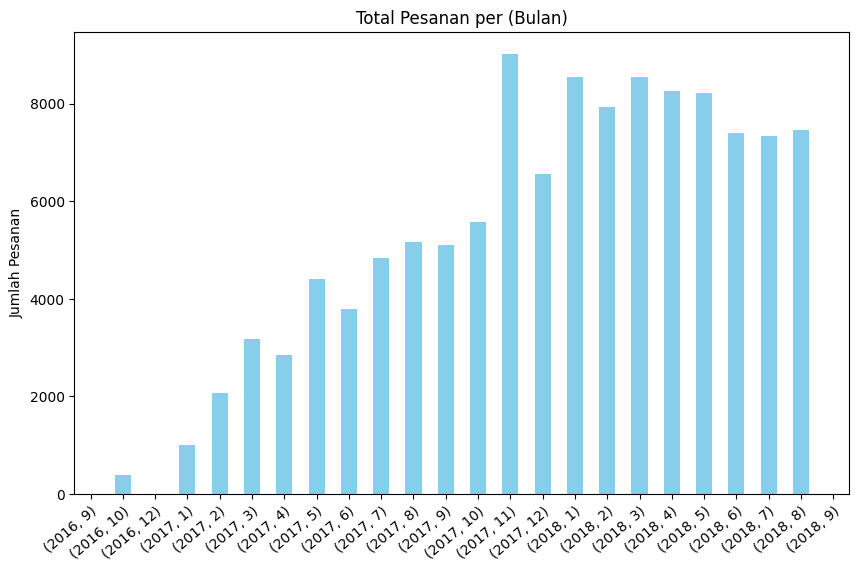

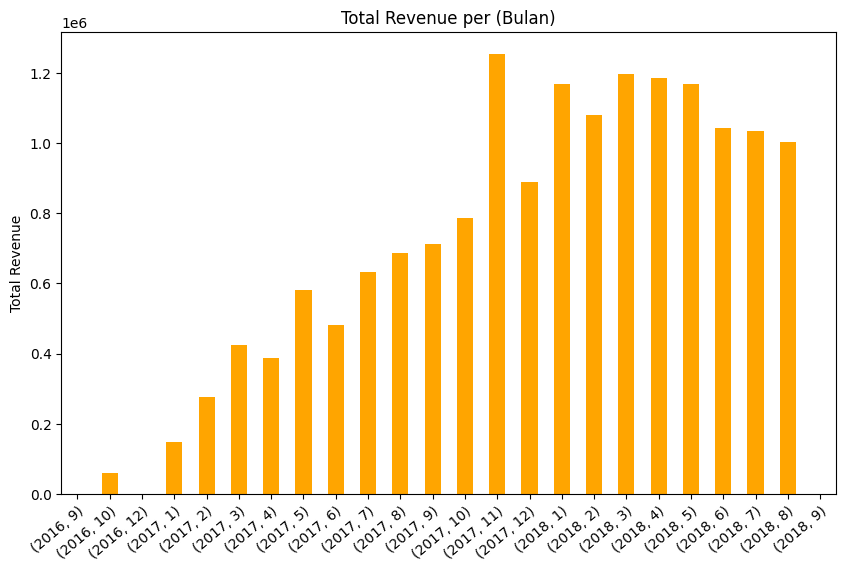

In [58]:

# Menampilkan visualisasi total revenue per bulan dengan rotasi label sumbu y
fig, ax = plt.subplots(figsize=(10, 6))
orders_per_month.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Total Pesanan per (Bulan)')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Pesanan')

# Rotasi label sumbu x dengan mode anchor
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', rotation_mode='anchor')

plt.show()

# Menampilkan visualisasi total revenue per bulan dengan rotasi label sumbu y
fig, ax = plt.subplots(figsize=(10, 6))
revenue_per_month.plot(kind='bar', color='orange', ax=ax)
ax.set_title('Total Revenue per (Bulan)')
ax.set_xlabel('')
ax.set_ylabel('Total Revenue')

# Rotasi label sumbu x dengan mode anchor
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', rotation_mode='anchor')

plt.show()


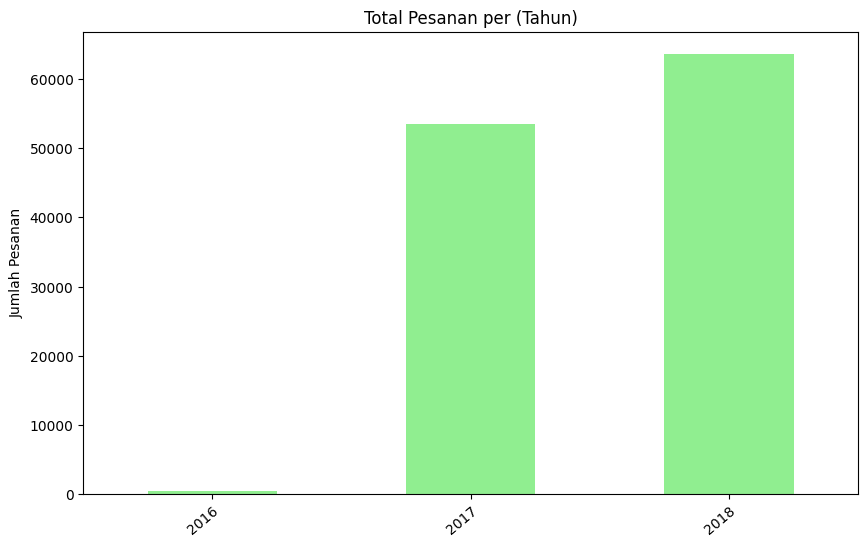

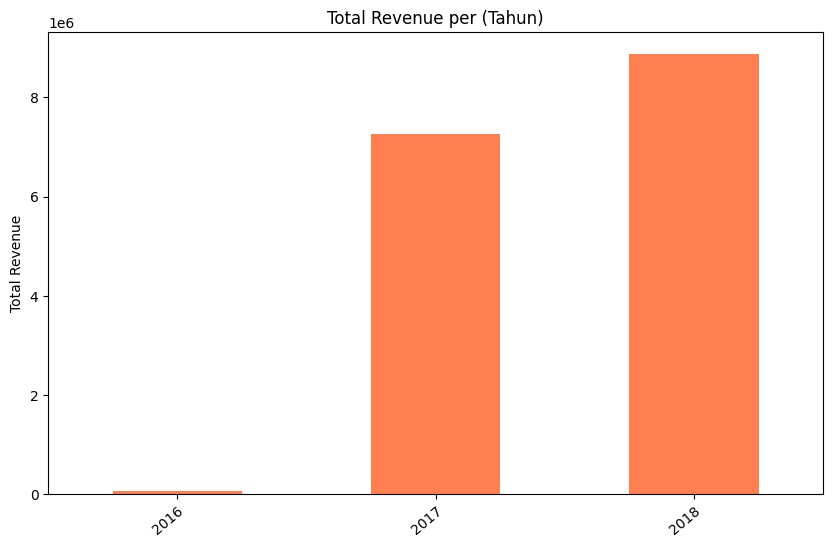

In [59]:

fig, ax = plt.subplots(figsize=(10, 6))
orders_per_year.plot(kind='bar', color='lightgreen', ax=ax)
ax.set_title('Total Pesanan per (Tahun)')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Pesanan')

# Rotasi label sumbu x dengan mode anchor
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', rotation_mode='anchor')

plt.show()


fig, ax = plt.subplots(figsize=(10, 6))
revenue_per_year.plot(kind='bar', color='coral', ax=ax)
ax.set_title('Total Revenue per (Tahun)')
ax.set_xlabel('')
ax.set_ylabel('Total Revenue')
# Rotasi label sumbu x dengan mode anchor
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', rotation_mode='anchor')
plt.show()

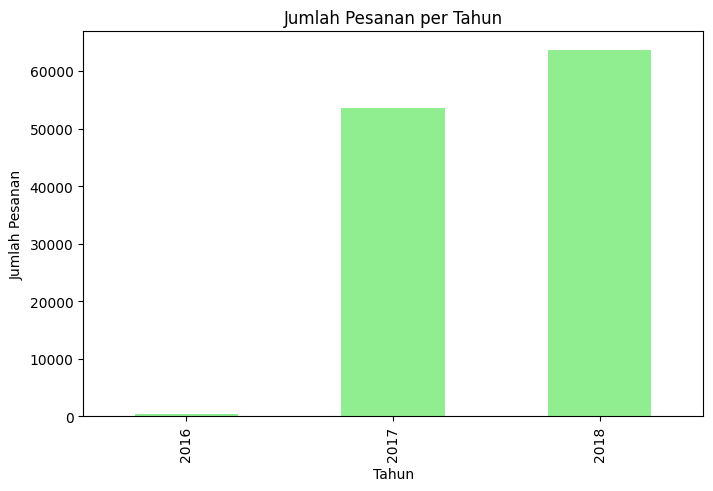

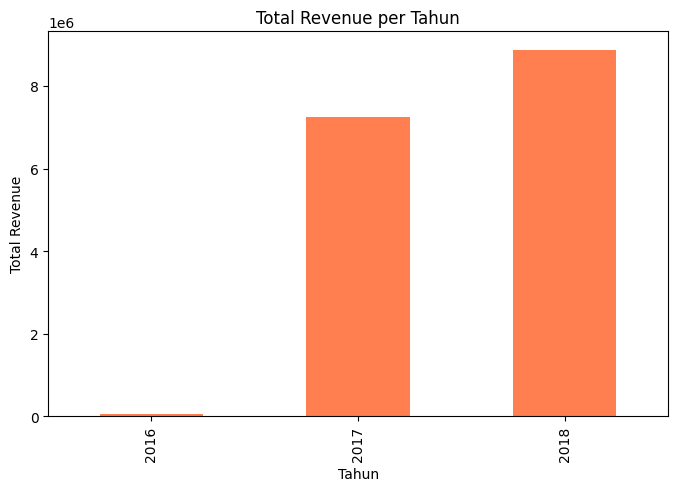

In [60]:
# Jumlah Pesanan per Tahun
orders_per_year.plot(kind='bar', figsize=(8, 5), color='lightgreen')
plt.title('Jumlah Pesanan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pesanan')
plt.show()

# Total Revenue per Tahun
revenue_per_year.plot(kind='bar', figsize=(8, 5), color='coral')
plt.title('Total Revenue per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Revenue')
plt.show()


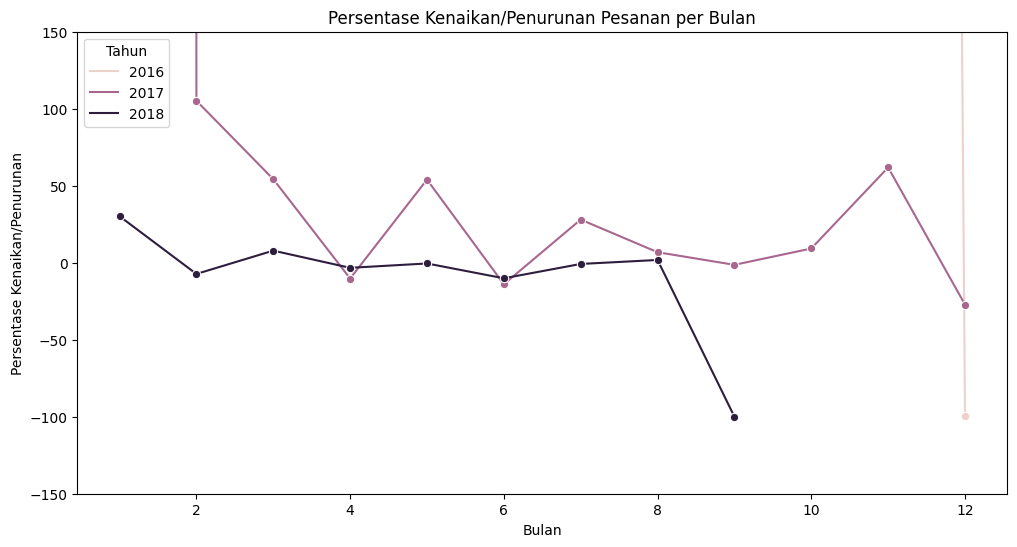

In [61]:
# Reset indeks untuk memudahkan visualisasi
orders_percentage_month_reset = orders_percentage_month.reset_index()

# Visualisasi persentase kenaikan atau penurunan pesanan per bulan
plt.figure(figsize=(12, 6))
sns.lineplot(x='purchase_month', y=0, hue='purchase_year', data=orders_percentage_month_reset, marker='o')
plt.title('Persentase Kenaikan/Penurunan Pesanan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Persentase Kenaikan/Penurunan')
plt.legend(title='Tahun')
plt.ylim(-150, 150)  # Sesuaikan batas y-axis agar grafik lebih mudah dipahami
plt.show()


### Pertanyaan 2:

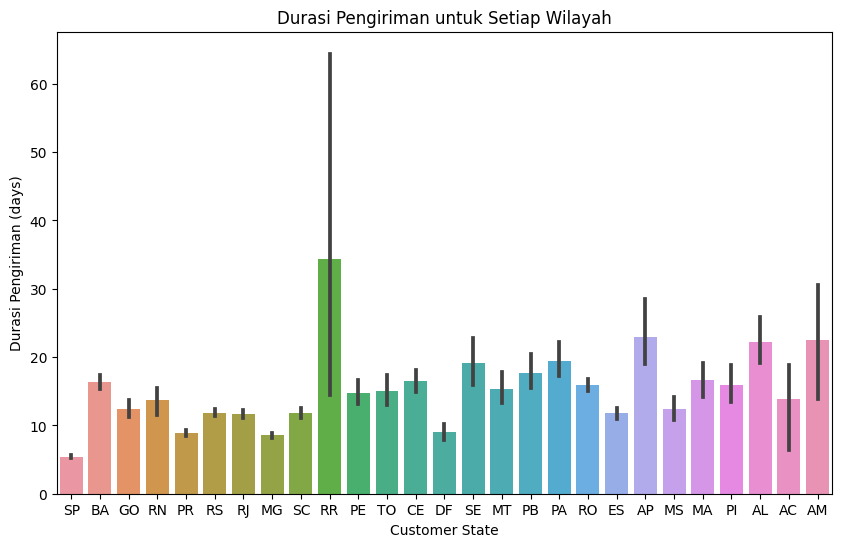

In [62]:
# Visualisasi waktu pengiriman
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_state', y='delivery_duration', data=delivery_info)
plt.title('Durasi Pengiriman untuk Setiap Wilayah')
plt.xlabel('Customer State')
plt.ylabel('Durasi Pengiriman (days)')
plt.show()

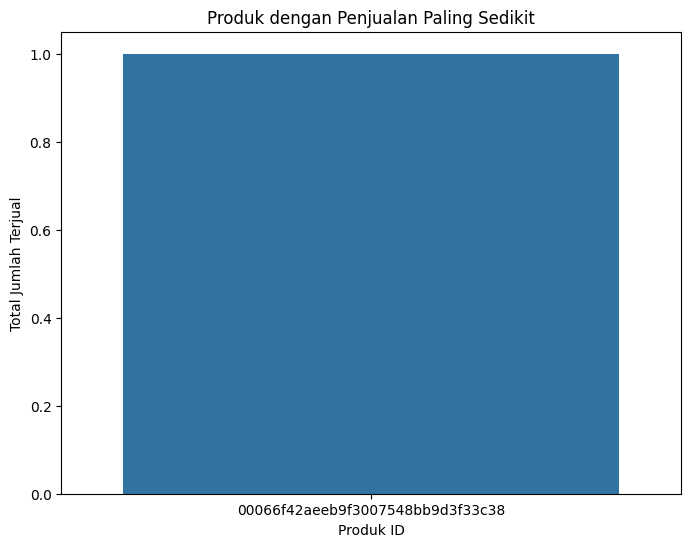

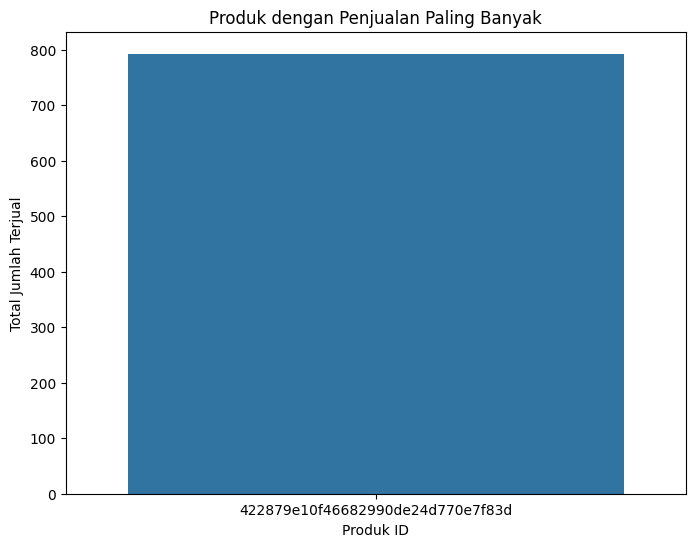

In [63]:
# Assuming you have product_sales DataFrame with columns 'product_id' and 'order_item_id'

# Find the product with the minimum and maximum sales
min_sold_product = product_sales.loc[product_sales['order_item_id'].idxmin()]
max_sold_product = product_sales.loc[product_sales['order_item_id'].idxmax()]

# Plot the bar chart for the product with the minimum sales
plt.figure(figsize=(8, 6))
sns.barplot(x='product_id', y='order_item_id', data=min_sold_product.to_frame().T)
plt.title('Produk dengan Penjualan Paling Sedikit')
plt.xlabel('Produk ID')
plt.ylabel('Total Jumlah Terjual')
plt.show()

# Plot the bar chart for the product with the maximum sales
plt.figure(figsize=(8, 6))
sns.barplot(x='product_id', y='order_item_id', data=max_sold_product.to_frame().T)
plt.title('Produk dengan Penjualan Paling Banyak')
plt.xlabel('Produk ID')
plt.ylabel('Total Jumlah Terjual')
plt.show()


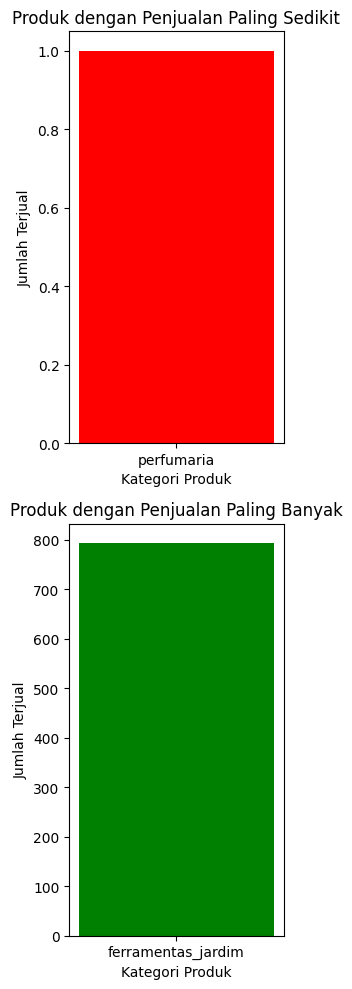

In [64]:
import matplotlib.pyplot as plt

# Plot data
fig, ax = plt.subplots(2, 1, figsize=(3, 10))

# Produk dengan Penjualan Paling Sedikit
ax[0].bar(min_sold_product_info['product_category_name'], min_sold_product_info['total_sold'], color='red')
ax[0].set_title('Produk dengan Penjualan Paling Sedikit')
ax[0].set_xlabel('Kategori Produk')
ax[0].set_ylabel('Jumlah Terjual')

# Produk dengan Penjualan Paling Banyak
ax[1].bar(max_sold_product_info['product_category_name'], max_sold_product_info['total_sold'], color='green')
ax[1].set_title('Produk dengan Penjualan Paling Banyak')
ax[1].set_xlabel('Kategori Produk')
ax[1].set_ylabel('Jumlah Terjual')

# Tampilkan plot
plt.tight_layout()
plt.show()


##RFM

###all_df

In [65]:
all_df2 = pd.merge(
    left=merged_data,
    right=orders_pembayaran_,
    how="left",
    left_on="order_id",
    right_on="order_id")
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,1.0,credit_card,1.0,18.12,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,3.0,voucher,1.0,2.00,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,19.0,8.0,13.0,2.0,voucher,1.0,18.59,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,19.0,13.0,19.0,1.0,boleto,1.0,141.46,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,24.0,19.0,21.0,1.0,credit_card,3.0,179.12,14840.0,guariba,SP


In [66]:
all_f = pd.merge(
    left=all_df,
    right=product_,
    how="outer",
    left_on="order_id",
    right_on="product_id")
all_f.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_id_y,product_category_name_y,product_name_lenght_y,product_description_lenght_y,product_photos_qty_y,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y,total_sold
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
all_df.groupby(by=["customer_id", "payment_type"]).agg({
                       "payment_value": "sum",
                       "payment_installments": "sum"
                       })

,,payment_value,payment_installments
customer_id,payment_type,,
00012a2ce6f8dcda20d059ce98491703,credit_card,114.74,8.0
000161a058600d5901f007fab4c27140,credit_card,67.41,5.0
0001fd6190edaaf884bcaf3d49edf079,credit_card,195.42,10.0
0002414f95344307404f0ace7a26f1d5,boleto,179.35,1.0
000379cdec625522490c315e70c7a9fb,boleto,107.01,1.0
...,...,...,...
fffecc9f79fd8c764f843e9951b11341,voucher,80.72,2.0
fffeda5b6d849fbd39689bb92087f431,credit_card,63.13,3.0
ffff42319e9b2d713724ae527742af25,credit_card,214.13,2.0


In [68]:

all_df.groupby(by=["customer_city", "payment_type"]).agg({
    "payment_value": "sum",
    "payment_installments": "sum"
    })

all_df.groupby(by=["order_approved_at", "customer_city"]).agg({
    "payment_value": "sum",
    "payment_type": "sum"
    })

,,payment_value,payment_type
order_approved_at,customer_city,,
2016-09-15 12:16:38,sao joaquim da barra,0.0000,0
2016-10-04 09:43:32,sao paulo,44.2300,credit_card
2016-10-04 10:18:57,rio de janeiro,35.6100,credit_card
2016-10-04 10:19:23,taubate,40.9500,credit_card
2016-10-04 10:25:46,sao paulo,114.7700,credit_card
...,...,...,...
2018-08-29 14:30:23,paracatu,61.2900,voucher
2018-08-29 14:31:07,curitiba,688.8175,credit_cardcredit_card
2018-08-29 15:05:22,sao caetano do sul,33.2300,credit_card


###Hasil RFM

In [69]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_["order_approved_at"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()


,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000161a058600d5901f007fab4c27140,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,1,179.35,382
4,000379cdec625522490c315e70c7a9fb,1,107.01,152


## Conclusion

- Conclution pertanyaan 1: performa penjualan & revenue perbulan dan tahun serta pergerakan setiap bulan nya

Total pesanan dan revenue yang terjadi pada tahun 2016 sampai 2018 setiap tahun nya semakin meningkat
Dan didapatkan penjualan selalu stabil di pertengahan tahun yaitu dari bulan 2 sampai bulan 8

- Conclution pertanyaan 2:
Produk apa yang paling banyak terjual dan sedikit serta wilayah dengan pengiriman tercepat dan terlama

Produk dengan kategori ferramentas_jardim menjadi produk dengan penjualan terbanyak dan perfumaria menjadi produk paling sedikit yang terjual.
Lalu didapatkan juga durasi pengiriman diwilayah RR dengan pengiriman produk tercepat yang pernah dikirim dan pengiriman paling lama terdapat di daera SP

In [70]:
all_df.to_csv("all_data.csv",index=False)